## 1. Load and analyse data

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading data
file_path = '../data/raw/transactions_train.csv'
data = pd.read_csv(file_path)

# Check data structure
print(data.info())
print(data.head())

# Ensure date column is in datetime format
data['t_dat'] = pd.to_datetime(data['t_dat'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB
None
        t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237              

## 2. Check data quality
### 2.1. Check for missing values

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


The dataset doesn't contain missing values. 

### 2.2. Check for duplicate rows
Check whether we have duplicate rows


In [5]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f'Number of duplicates: {duplicates}')

Number of duplicates: 2974905


As per dataset description, duplicate rows could indicate that a user has bought the same item multiple times.

## 2.3 Estimating the distribution of values:

Let's look at the basic statistics for columns:

In [6]:
# Basic statistics on numerical data
print(data.describe())

# Checking for unique values in important columns
print(f"Unique customer_id: {data['customer_id'].nunique()}")
print(f"Unique article_id: {data['article_id'].nunique()}")

                               t_dat    article_id         price  \
count                       31788324  3.178832e+07  3.178832e+07   
mean   2019-09-15 17:27:46.894452992  6.962272e+08  2.782927e-02   
min              2018-09-20 00:00:00  1.087750e+08  1.694915e-05   
25%              2019-03-28 00:00:00  6.328030e+08  1.581356e-02   
50%              2019-08-25 00:00:00  7.145820e+08  2.540678e-02   
75%              2020-03-29 00:00:00  7.865240e+08  3.388136e-02   
max              2020-09-22 00:00:00  9.562170e+08  5.915254e-01   
std                              NaN  1.334480e+08  1.918113e-02   

       sales_channel_id  
count      3.178832e+07  
mean       1.704028e+00  
min        1.000000e+00  
25%        1.000000e+00  
50%        2.000000e+00  
75%        2.000000e+00  
max        2.000000e+00  
std        4.564786e-01  
Unique customer_id: 1362281
Unique article_id: 104547


In [7]:
# Step 1: Group by customer_id and date (to define sessions)
# Count the number of items in each session
session_counts = data.groupby(['customer_id', 't_dat']).size().reset_index(name='items_per_session')

In [19]:
# Step 2: Calculate the distribution of items per session
#item_distribution = session_counts['items_per_session'].value_counts().sort_index()
# Calculate the distribution of items per session
# Create a DataFrame that includes count of sessions for each number of items per session
item_distribution = session_counts['items_per_session'].value_counts().sort_index().reset_index()
item_distribution.columns = ['items_per_session', 'count_of_sessions']


print(item_distribution.info())
print(item_distribution.head())
print(item_distribution.tail())
print(item_distribution.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   items_per_session  152 non-null    int64
 1   count_of_sessions  152 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB
None
   items_per_session  count_of_sessions
0                  1            2687043
1                  2            2120525
2                  3            1308634
3                  4             883951
4                  5             553178
     items_per_session  count_of_sessions
147                199                  1
148                220                  1
149                221                  1
150                336                  1
151                570                  1
       items_per_session  count_of_sessions
count         152.000000       1.520000e+02
mean           85.480263       5.973802e+04
std            68.304535       3.076907e+05
m

This DataFrame represents aggregated session data. It shows how many sessions had a specific number of items.

The average number of items per session is approximately 85. The average count of sessions is 59,738

## 3. Visualize the distribution of items per session

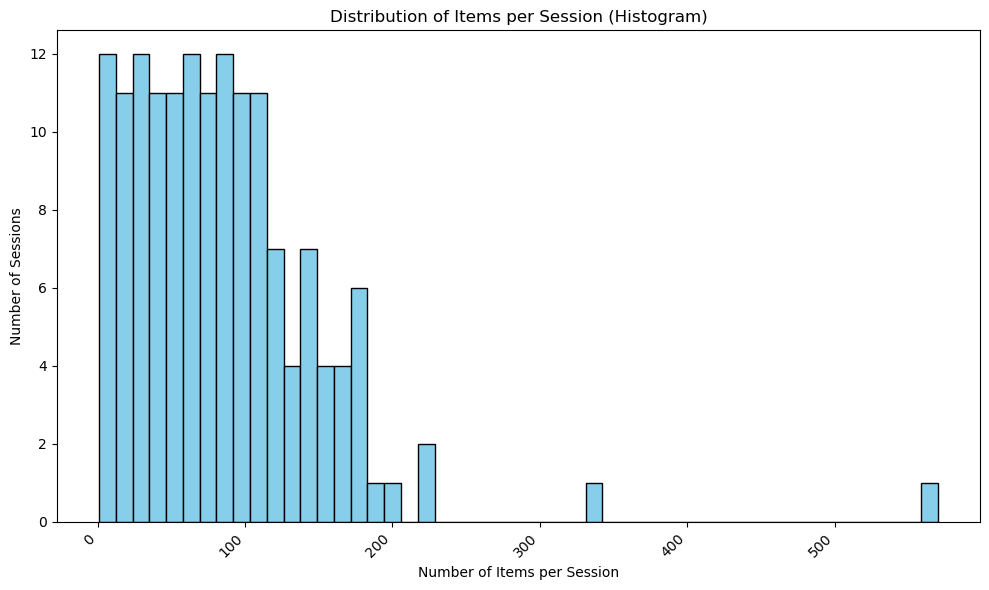

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming your data is in a DataFrame named `item_distribution` and the column with items per session is named `items_per_session`

# Calculate the number of bins
num_bins = 50  # Example: 30 bins

# Create bins
bins = np.linspace(item_distribution['items_per_session'].min(), item_distribution['items_per_session'].max(), num_bins + 1)

# Count items per bin
item_bin_distribution = item_distribution['items_per_session'].value_counts(bins=bins).sort_index()

# Plotting (using histogram for continuous-like data)
plt.figure(figsize=(10, 6))
plt.hist(item_distribution['items_per_session'], bins=bins, edgecolor='black', color='skyblue')
plt.title('Distribution of Items per Session (Histogram)')
plt.xlabel('Number of Items per Session')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()